In [2]:
# for data
import numpy as np # perform math operations (matrix math)
import pandas as pd 
from pandas import Series, DataFrame

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# for math
import math 

# Machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# for evaluating ML results
from sklearn import metrics

logistic regression is a classification algorithm. 


In this data set we will answer the following questions. 
1. What is the probability does an individual will have breast cancer containing all the features. Or How each of the variable X impacts Y. 
2. We will choose the right coefficients/variables for the training data set. basically, we will eliminate the variables/features that have a high collinearity from 3 differents groupings of features, the mean, standard error (SE), and worst (mean of the three largest values)

In [3]:
data = pd.read_csv('Breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
# here the id is already removed
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


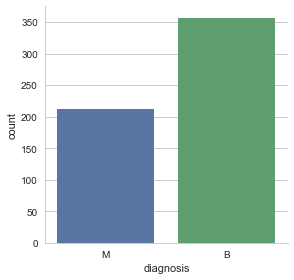

In [6]:
sns.factorplot('diagnosis', data=data, kind='count')

In [7]:
# let's change it to 0 for benign and 1 for Malignant
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.drop('id',axis=1, inplace = True)

data.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# since the data is divided into 3 categories, MEAN, SE, and WORST thus creating 30 variables 
# we will partition all of the variables according to each group. 

feature_mean_df = pd.DataFrame(data.iloc[:,1:11])
feature_se_df = pd.DataFrame(data.iloc[:,11:21])
feature_worst_df = pd.DataFrame(data.iloc[:,21:33])


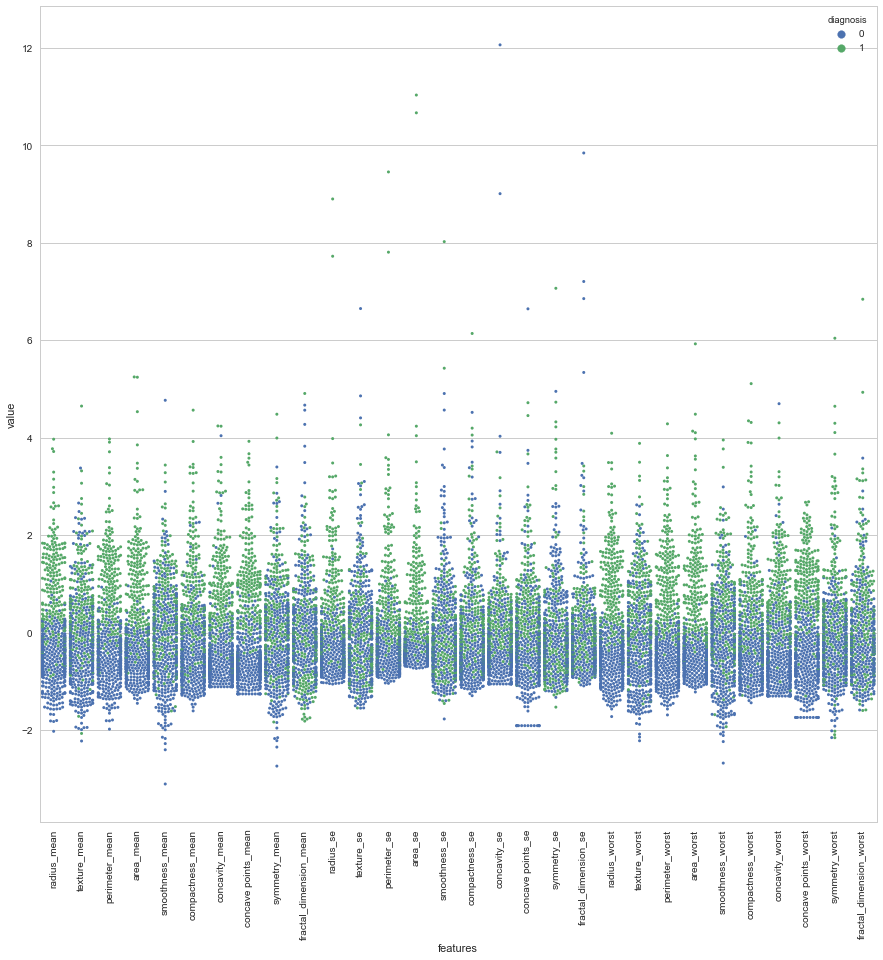

In [11]:
#standardization of the data so we can see the spread of the diagnosis on each variables.
# swarmplot

variables = data.drop('diagnosis', axis = 1)
y1 = pd.DataFrame(data['diagnosis'])
# we can also use the preprocessing.scale from sklearn.
variables_std = (variables - variables.mean())/ variables.std()

features = pd.concat([y1,variables_std],axis = 1)
features = pd.melt(features, id_vars='diagnosis', var_name='features')

plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = features, size = 3)

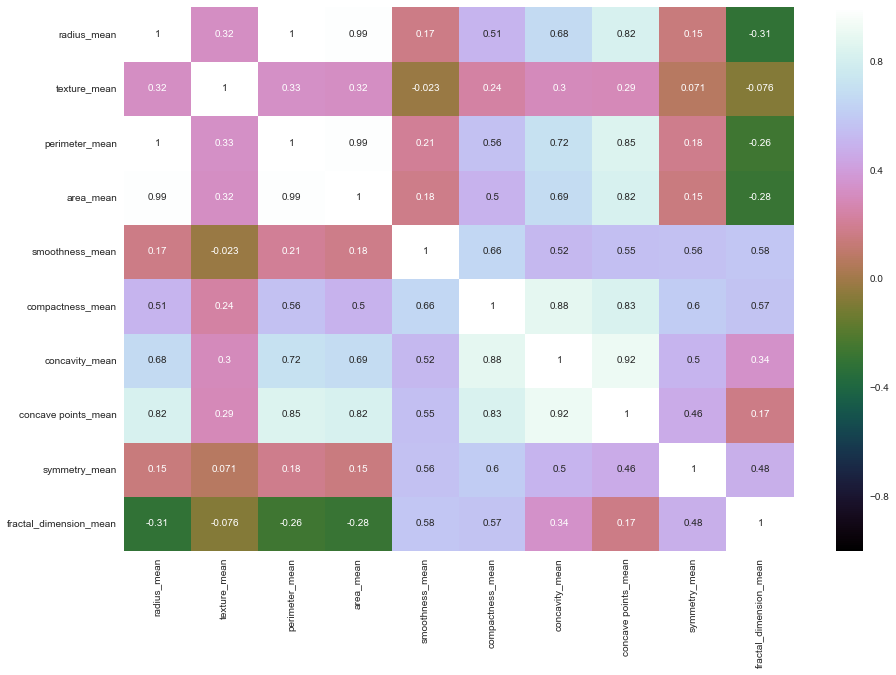

In [14]:
# see the correlation of each variables in numbers

fig, feature_mean_corr = plt.subplots(figsize=(15,10))
plt.xticks(rotation = 90)
feature_mean_corr = sns.heatmap(feature_mean_df.corr(), annot = True, cmap = 'cubehelix')

As you can see, there are a lot of high collinearity above, thus, we wanted to more of it in the visualization below. 

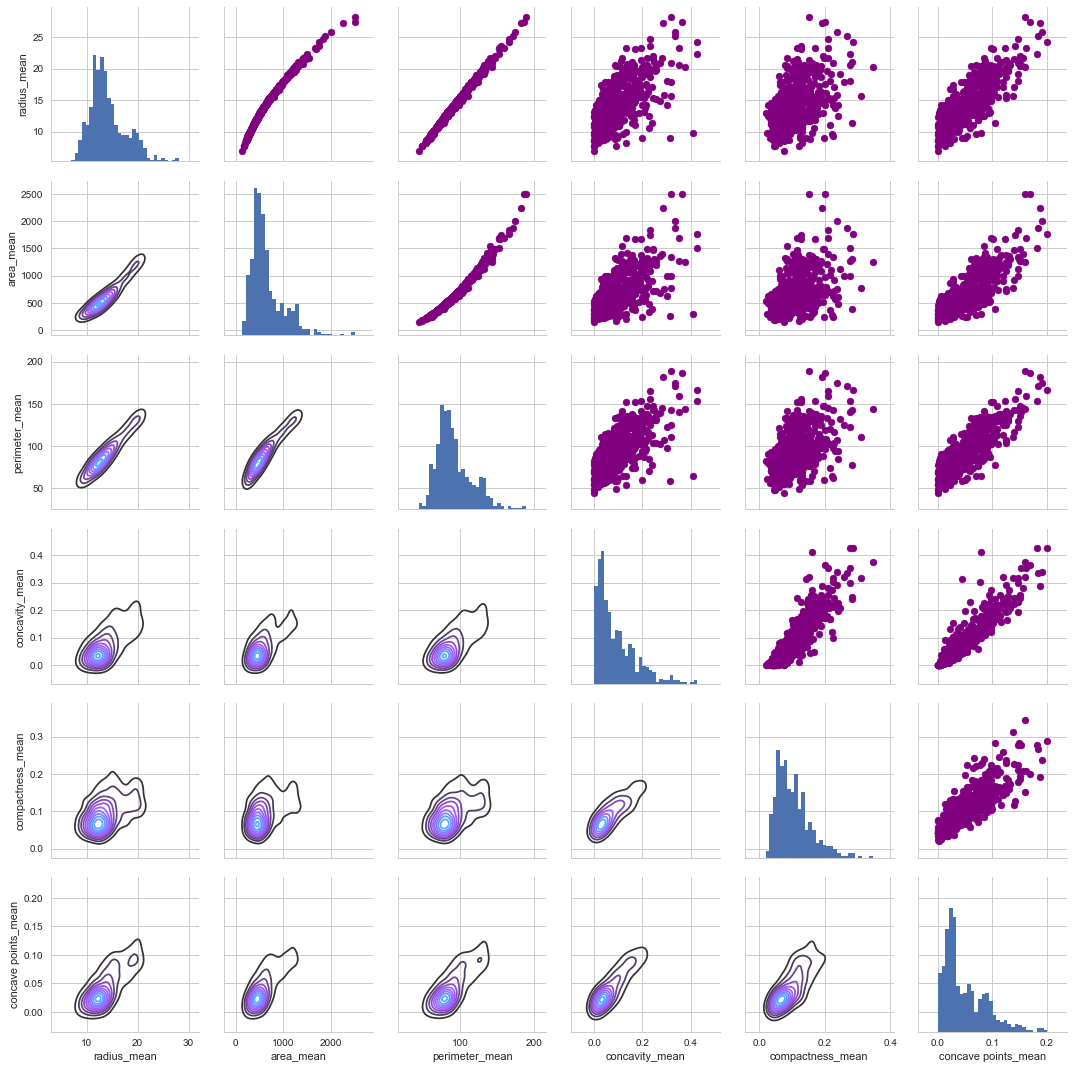

In [15]:
fig_high_coll_mean = sns.PairGrid(feature_mean_df.loc[:,['radius_mean', 'area_mean', 'perimeter_mean', 'concavity_mean',
                                                   'compactness_mean', 'concave points_mean']])
fig_high_coll_mean.map_upper(plt.scatter, color = 'purple')

fig_high_coll_mean.map_lower(sns.kdeplot, cmap = 'cool_d')

fig_high_coll_mean.map_diag(plt.hist, bins = 30)



based on the observation, the variables namely:  radius mean & area mean, area mean & perimeter mean,  concavity mean & compactness mean, concave points mean & compactness, concavity mean & concave point, have high collinearity value.

we will just pick one between the 2 options among the variables with high collinearity. This is necessary because one might be linearly predicted from the others. I chose to pick the following. 
area mean, compactness, together with the other variables. 

So the variables that will be tested are: (these will be the prediction variable features or the X).

texture_mean, area_mean, smoothness_mean, compactness_mean, symmetry_mean, fractal_dimension_mean

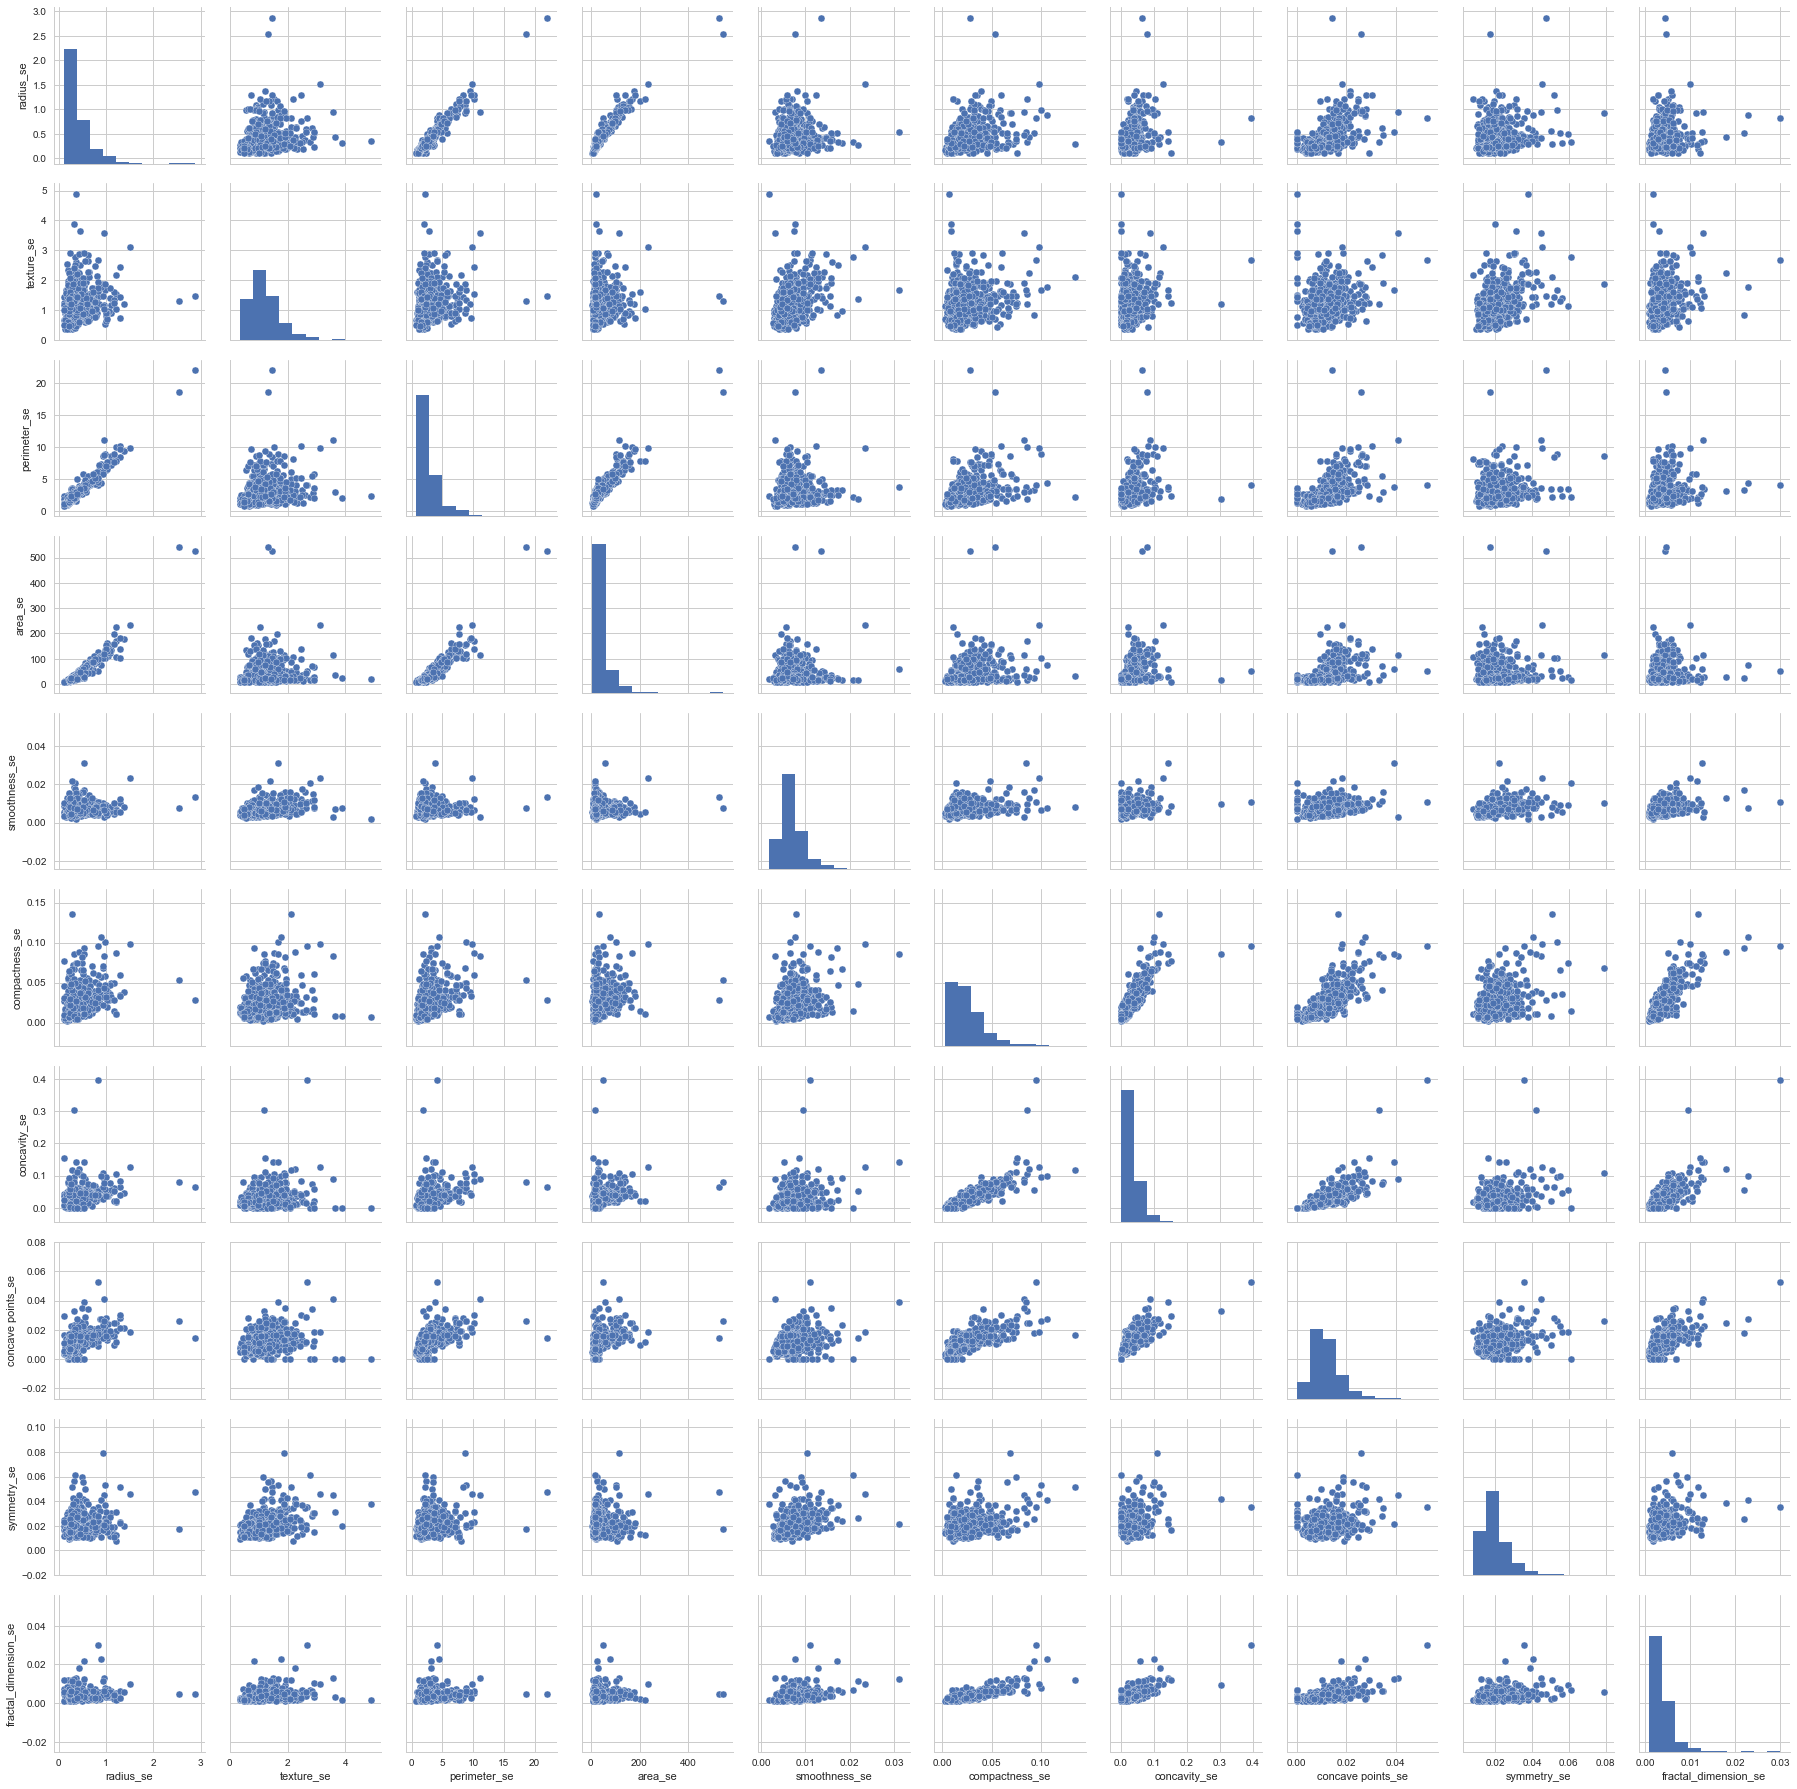

In [16]:
# now we will do the same with the standard error.
sns.pairplot(feature_se_df)

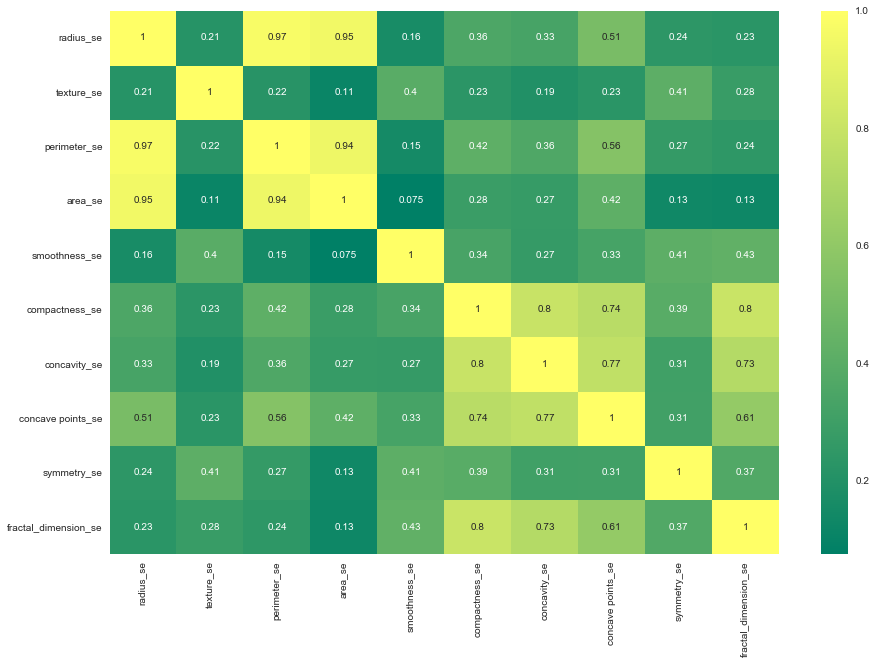

In [17]:
fig, feature_se_corr = plt.subplots(figsize=(15,10))
plt.xticks(rotation = 90)
feature_se_corr = sns.heatmap(feature_se_df.corr(), annot = True, cmap = 'summer')

The same multicollinearity will be expected from the standard error df. perimeter_se, area_se, radius_se, concave points_se, concavity_se, compactness_se.

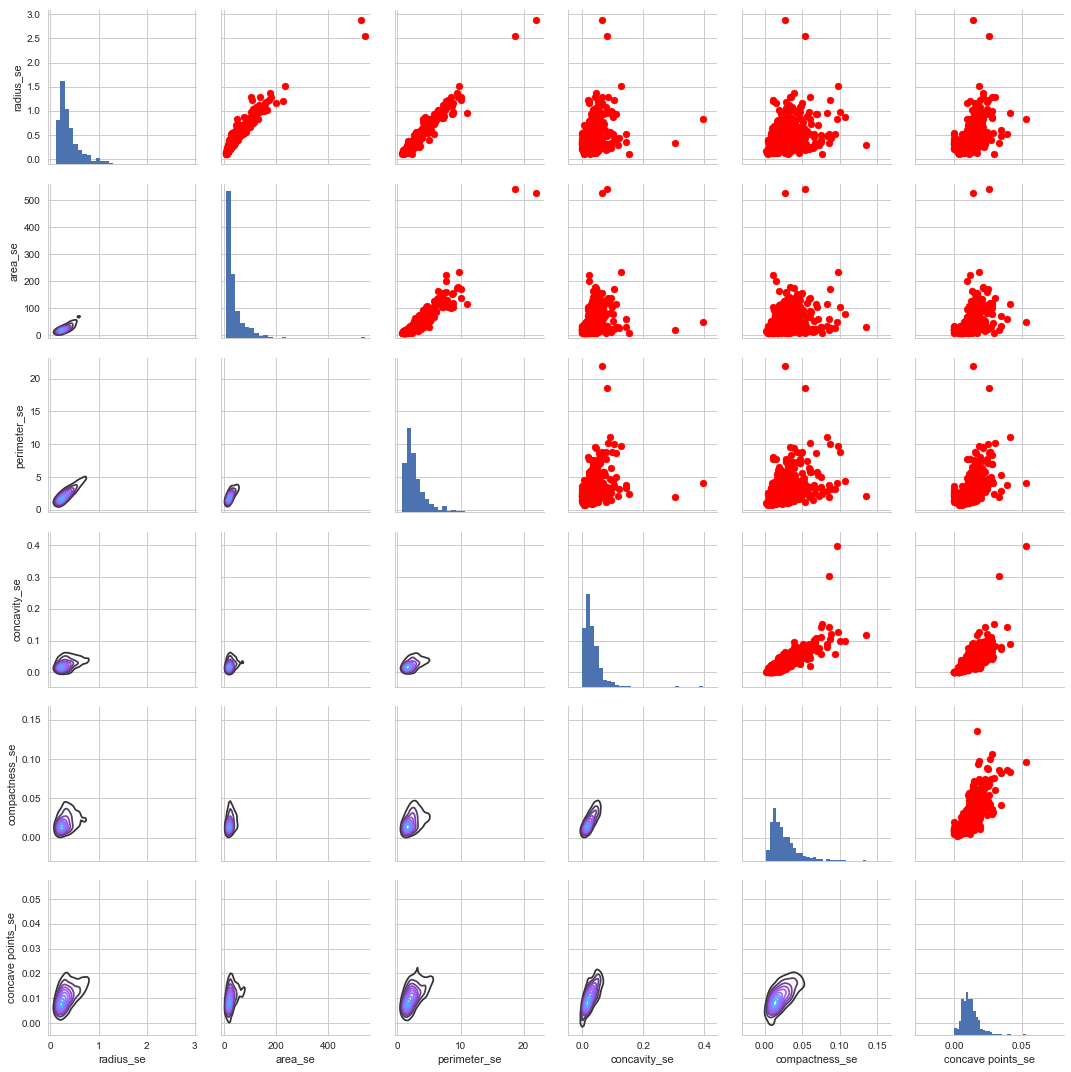

In [19]:
fig_high_coll_se = sns.PairGrid(feature_se_df.loc[:,['radius_se', 'area_se', 'perimeter_se','concavity_se', 'compactness_se', 'concave points_se']])
fig_high_coll_se.map_upper(plt.scatter, color='red')

fig_high_coll_se.map_diag(plt.hist, bins = 30)

fig_high_coll_se.map_lower(sns.kdeplot, cmap = 'cool_d')

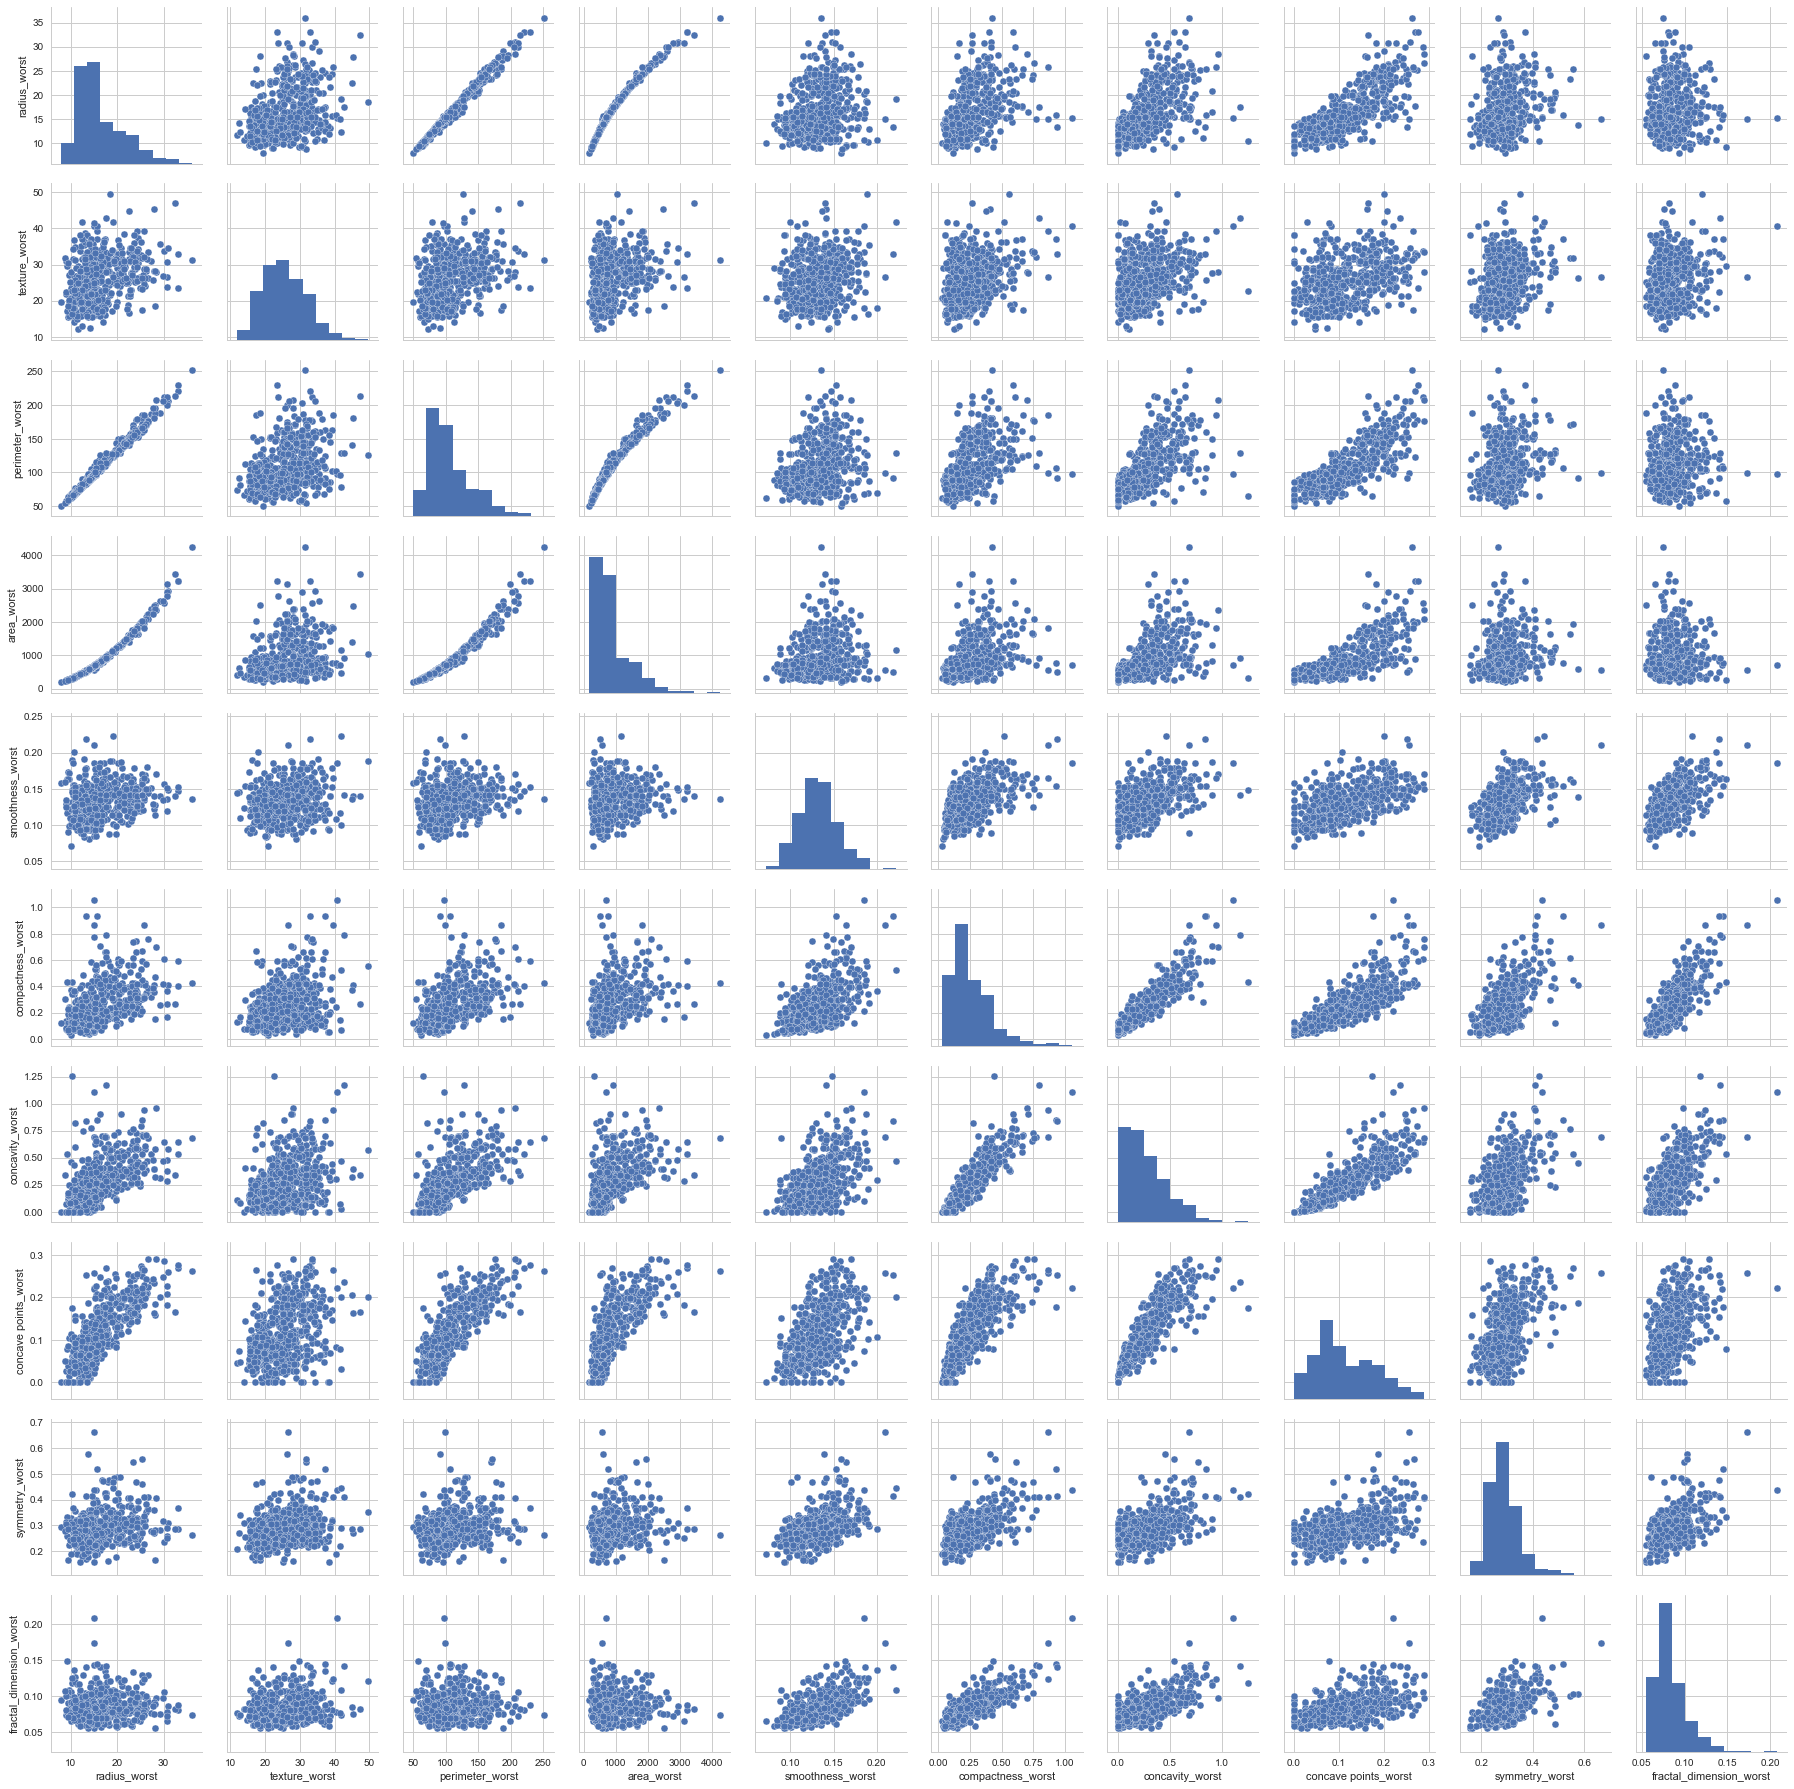

In [20]:
sns.pairplot(feature_worst_df)

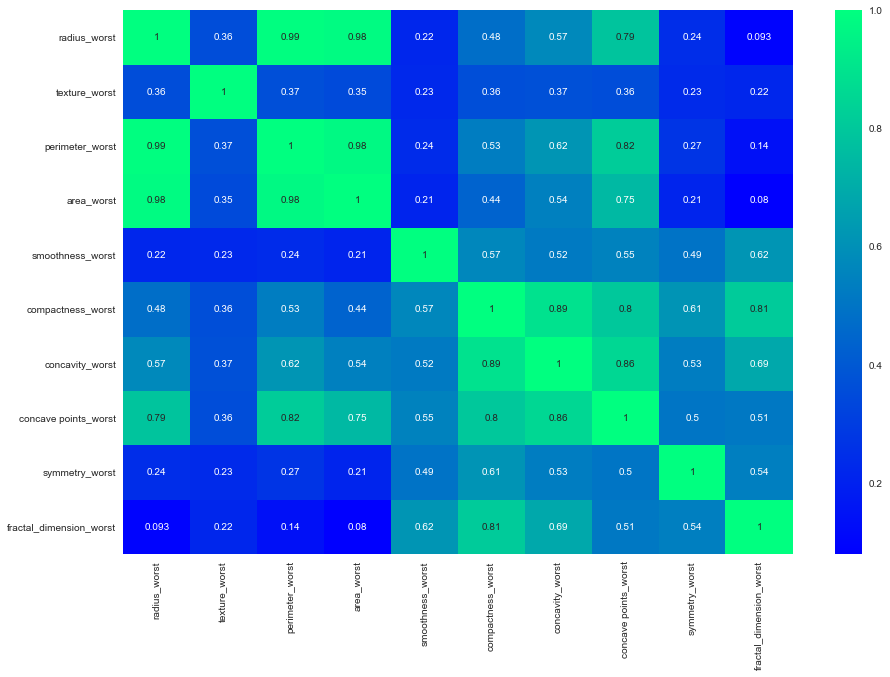

In [21]:
fig, feature_worst_corr = plt.subplots(figsize=(15,10))

plt.xticks(rotation = 90)

feature_worst_corr = sns.heatmap(feature_worst_df.corr(), annot = True, cmap = 'winter')


On the feature_worst_df heatmap, we will still choose the same variables that have a high collinearity with the feature_mean_df and feature_se_df, 

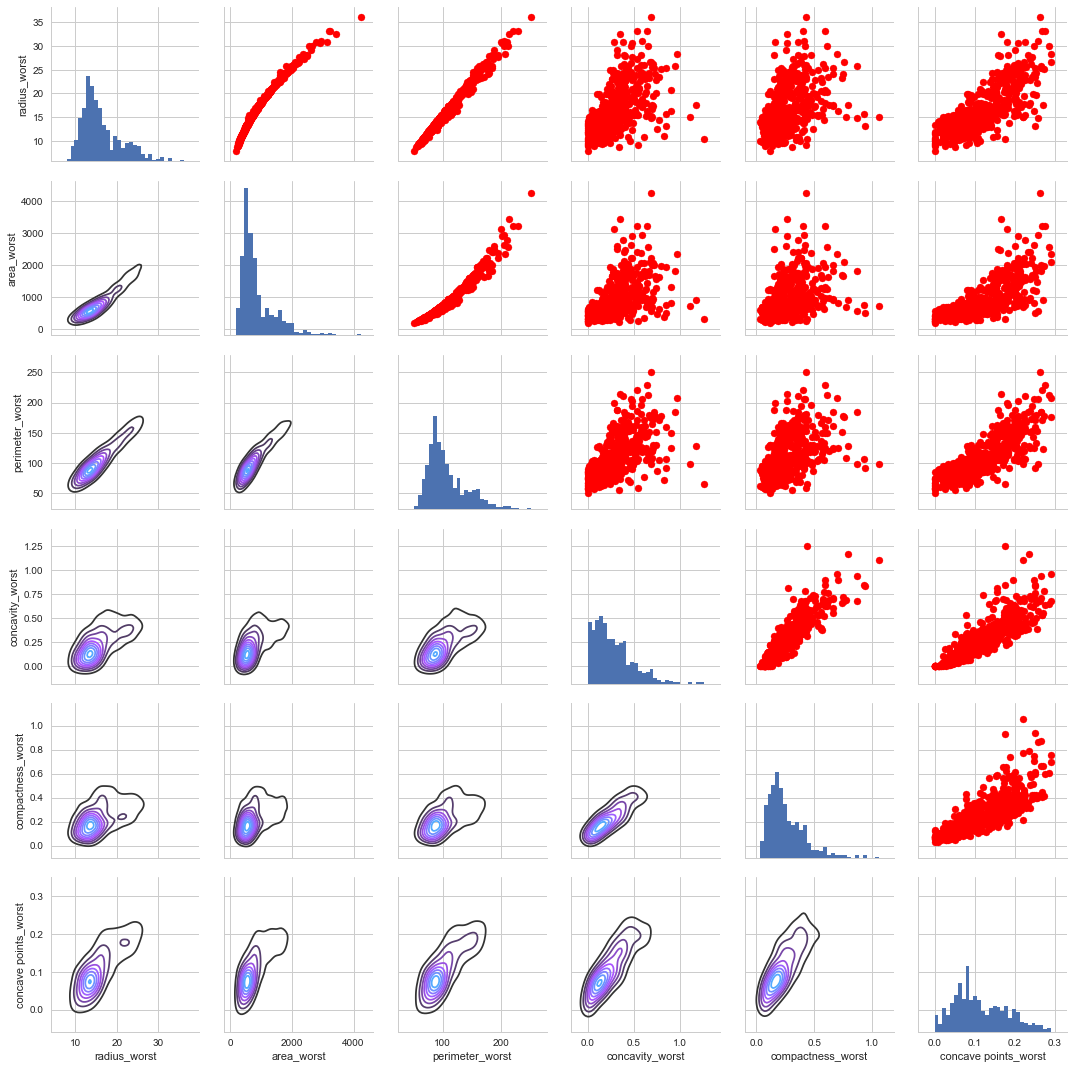

In [22]:
fig_high_coll_worst = sns.PairGrid(feature_worst_df.loc[:,['radius_worst', 'area_worst', 'perimeter_worst','concavity_worst', 'compactness_worst', 'concave points_worst']])

fig_high_coll_worst.map_upper(plt.scatter, color = 'red')

fig_high_coll_worst.map_diag(plt.hist, bins = 30)

fig_high_coll_worst.map_lower(sns.kdeplot, cmap = 'cool_d')

In [23]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
# now we are going to make another data without all of the variables with high collinearity.
data_variables = data.drop(['diagnosis','perimeter_mean','radius_mean', 'concavity_mean','concave points_mean','perimeter_se','radius_se', 'concavity_se','concave points_se','perimeter_worst','radius_worst', 'concavity_worst','concave points_worst','area_worst','texture_worst','compactness_worst'], axis = 1)

data_variables.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.27760,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.03003,0.006193,0.1622,0.4601,0.11890
1,17.77,1326.0,0.08474,0.07864,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01389,0.003532,0.1238,0.2750,0.08902
2,21.25,1203.0,0.10960,0.15990,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.02250,0.004571,0.1444,0.3613,0.08758
3,20.38,386.1,0.14250,0.28390,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05963,0.009208,0.2098,0.6638,0.17300
4,14.34,1297.0,0.10030,0.13280,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.01756,0.005115,0.1374,0.2364,0.07678


In [25]:
# now I will set the response variable as Y, and I will use the 'diagnosis' for this. 

Y = data.diagnosis

X = data_variables


In [26]:
# I will set a 1-dimensional array in order to use the sklearn. 

Y = np.ravel(Y)

Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

In [34]:
# creating the Logistic regression model 
log_model = LogisticRegression()

# fitting our data
log_model.fit(X,Y)

#Check the accuracy
log_model.score(X,Y)


0.91564147627416526

The result above shows the 91.56% accuracy rating. 

In [35]:
# now I am going to check the null error rate by checking the percentage of the mean of the patients who got cancer. 
Y.mean()

0.37258347978910367

This means that if our model will guess 'it is not a cancer' then that would be 1 - .3725% = 0.63 or 63% accuracy only. The result above shows a better accuracy rate than the null error however, it's not really that much better. 

In [36]:
# I will check the strongest predictors of X variables by checking their coefficients.
X_predictors_coeff_df = pd.DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

X_predictors_coeff_df

,0,1
0,texture_mean,[0.114257961061]
1,area_mean,[0.00299821803756]
2,smoothness_mean,[-0.0553199173548]
3,compactness_mean,[1.51687210038]
4,symmetry_mean,[-0.271062129823]
5,fractal_dimension_mean,[-0.195494290907]
6,texture_se,[-1.43674079083]
7,area_se,[0.0860061740266]
8,smoothness_se,[-0.0306767109845]
9,compactness_se,[0.190814540956]


As you can see on the result above, the POSITIVE coefficients corresponds on the increasing likelihod of an individual having a breast cancer on the other hand, the NEGATIVE coefficients corresponds to the decreasing likelihood of an individual not having breast cancer.

The variable that is observed to have a very strong predictor is the compactness, Compactness is the ratio of the volume and the surface area. Smoothness mean and Symmetry mean. 
This makes sense because according to the study, the tumors that are cancerous are irregular in shape thus unsymmetrical, and firm and solid, thus, compact. 

In [37]:
# testing and training the datasets 

# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# new logistic model 
log_model2 = LogisticRegression()

# fit the model
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
# now that I already train the data, we will test our new accuracy score and predict the classification of the X_test set. 

X_class_predict = log_model2.predict(X_test)

# compare the actual classes to the predicted test X classes
print metrics.accuracy_score(Y_test, X_class_predict)



0.874125874126


 We have a 92.31% accuracy score which is not far from our previous score which is 94.55%. 

SVM

Logistic regression and SVM have almost the same algorithm. they are both classifiers, however, SVM is more flexible and good on working for non linear data. They are also not that sensitive to mulitcollinearity so I will use all of the data and they are also good for outlier detection which are also present in the graph and scatterplot as shown above. We will try here on this kernel which one gives better result. 

In [41]:
from sklearn.svm import SVC

# create a support vector classification for the data
svm_model = SVC(kernel='linear')

# we will split the data into training an testing sets but before that I will create a new dataframe for the our SVM model and will not 
# delete the variables with high collinearity.
X_2 = data.drop('diagnosis', axis = 1)

# split the data.
X_2_train,X_2_test, Y_train, Y_test = train_test_split(X_2,Y)

#fit the model
svm_model.fit(X_2_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
# let's get the predictions 
X_2_predict = svm_model.predict(X_2_test)
response = Y_test

# compare results 
print metrics.accuracy_score(X_2_predict,Y_test)

0.972027972028


The accuracy is just 97.20% with support vector classification. 